In [ ]:
%load_ext autoreload
%autoreload 2

# Dataset Creation

In [57]:
from datasets import load_dataset
import tqdm as tqdm

books_movie_cleaning = load_dataset("ada-datadruids/movies_based_on_books_with_budget")
movies_based_on_books_df = books_movie_cleaning['train'].to_pandas()

movies_based_on_books_df.drop(columns=['Unnamed: 0'], inplace=True)
print(len(movies_based_on_books_df))
movies_based_on_books_df.head()

1845


,movie_id,movie_cluster,movie_name,release_date,runtime_x,language,country,genres,movie_year,index,...,revenue,budget,rb_ratio,book_id,normalized_rating_x,standardized_rating_x,normalized_rating_y,standardized_rating_y,length,review_count
0,77856,/m/0kcn7,Mary Poppins,1964-08-27,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,1279,...,103082380.0,6000000.0,17.180397,152380.0,0.802817,1.263138,0.680000,0.676011,209.0,4387.0
1,1369204,/m/04x8zs,Juarez,1939,125.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/04xvh5"": ""Costume drama"", ""/m/03bxz7"": ""B...",1939,1504,...,0.0,0.0,NaN,10546105.0,0.732394,0.768571,0.763333,1.545003,384.0,1.0
2,164388,/m/015wmt,The Great Santini,1979-10-26,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/07s9rl0"": ""...",1979,883,...,0.0,0.0,NaN,1110004.0,0.718310,0.669658,0.713333,1.023608,536.0,1115.0
3,19095614,/m/04yc5nd,The Castle,1968,88.0,"{""/m/04306rv"": ""German Language""}","{""/m/082fr"": ""West Germany""}","{""/m/02n4kr"": ""Mystery"", ""/m/07s9rl0"": ""Drama""}",1968,395,...,0.0,0.0,NaN,152864.0,0.676056,0.372918,0.656667,0.432693,401.0,1595.0
4,13613357,/m/03cbvzw,Grand Canary,1934-07-20,78.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",1934,867,...,0.0,0.0,NaN,37941573.0,0.746479,0.867485,0.506667,-1.131492,224.0,12.0


In [58]:
movies_based_on_books_df.dropna(subset=['rb_ratio'], inplace=True)
print(len(movies_based_on_books_df))

659


In [59]:
movies_based_on_books_df.to_csv('movies_based_on_books_filtered.csv', index=False)

## Create Dataset of Movies not Based on Books

In [60]:
full_tmdb_dataset = load_dataset("ada-datadruids/full_tmdb_movies_dataset")
full_tmdb_dataset_df = full_tmdb_dataset['train'].to_pandas()
print(len(full_tmdb_dataset_df))
full_tmdb_dataset_df.head()

1142342


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [61]:
import pandas as pd

full_tmdb_dataset_df.dropna(subset=['revenue'], inplace=True)
full_tmdb_dataset_df = full_tmdb_dataset_df[full_tmdb_dataset_df['revenue'] != 0]
full_tmdb_dataset_df.drop_duplicates(subset=['imdb_id', 'id'], inplace=True)
full_tmdb_dataset_df.dropna(subset=['budget'], inplace=True)
full_tmdb_dataset_df = full_tmdb_dataset_df[full_tmdb_dataset_df['budget'] != 0]

full_tmdb_dataset_df['release_date'] = pd.to_datetime(full_tmdb_dataset_df['release_date'])
full_tmdb_dataset_df = full_tmdb_dataset_df[full_tmdb_dataset_df['release_date'].dt.year <= 2014]
print(len(full_tmdb_dataset_df))

8353


In [62]:
imdb_ids_to_remove = movies_based_on_books_df['imdbid'].tolist()
# tmdb_dataset_reduced_df = full_tmdb_dataset_df[~c]
full_tmdb_dataset_df['based_on_book'] = full_tmdb_dataset_df['imdb_id'].isin(imdb_ids_to_remove)
print(len(full_tmdb_dataset_df))
full_tmdb_dataset_df.head()

8353
based_on_book
False    7694
True      659
Name: count, dtype: int64


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False


In [63]:
full_tmdb_dataset_df.to_csv('regression_dataset_tmdb.csv', index=False)

In [64]:
full_tmdb_dataset_df['based_on_book'].value_counts()

based_on_book
False    7694
True      659
Name: count, dtype: int64

# Regression

In [4]:
from datasets import load_dataset
import tqdm as tqdm

regression_dataset_tmdb_raw_df = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()

print(len(regression_dataset_tmdb_raw_df))
regression_dataset_tmdb_raw_df.head()

8353


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False


In [8]:
from utils.regression_utils import adjust_for_inflation

regression_dataset_tmdb_raw_df = adjust_for_inflation(regression_dataset_tmdb_raw_df, ['budget', 'revenue'], is_plotting_enabled=False)
regression_dataset_tmdb_raw_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book,movie_year,adjusted_budget,adjusted_revenue
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False,2010,1.737071e+08,8.962556e+08
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False,2014,1.650000e+08,7.017292e+08
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False,2008,2.034170e+08,1.104564e+09
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False,2009,2.615235e+08,3.226236e+09
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False,2012,2.268438e+08,1.566063e+09


In [9]:
from utils.regression_utils import multi_one_hot_encode_columns

# Might want to keep release data in the future???
# production companies removed as there are over 100'000 unique values
regression_dataset_tmdb_raw_df.drop(columns=['keywords', 'id', 'title', 'release_date', 'backdrop_path', 'homepage', 'original_title', 'overview', 'poster_path', 'tagline', 'production_companies', 'original_language', 'revenue', 'budget', 'imdb_id'], inplace=True)

regression_dataset_processed_df = multi_one_hot_encode_columns(
    regression_dataset_tmdb_raw_df,
    column_names_mohe=['genres', 'spoken_languages', 'production_countries'], # keywords not taken for now
    column_names_ohe=['status'],
)


In [10]:
regression_dataset_processed_df.head()

,vote_average,vote_count,runtime,adult,popularity,based_on_book,movie_year,adjusted_budget,adjusted_revenue,genres_count,...,production_countries_China,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Russia,production_countries_Spain,production_countries_United Kingdom,production_countries_United States of America
0,8.364,34495,148,False,83.952,False,2010,1.737071e+08,8.962556e+08,3,...,0,0,0,0,0,0,0,0,1,1
1,8.417,32571,169,False,140.241,False,2014,1.650000e+08,7.017292e+08,3,...,0,0,0,0,0,0,0,0,1,1
2,8.512,30619,152,False,130.643,False,2008,2.034170e+08,1.104564e+09,4,...,0,0,0,0,0,0,0,0,1,1
3,7.573,29815,162,False,79.932,False,2009,2.615235e+08,3.226236e+09,4,...,0,0,0,0,0,0,0,0,1,1
4,7.710,29166,143,False,98.082,False,2012,2.268438e+08,1.566063e+09,3,...,0,0,0,0,0,0,0,0,0,1


## Find Relation Between Budget and Revenue

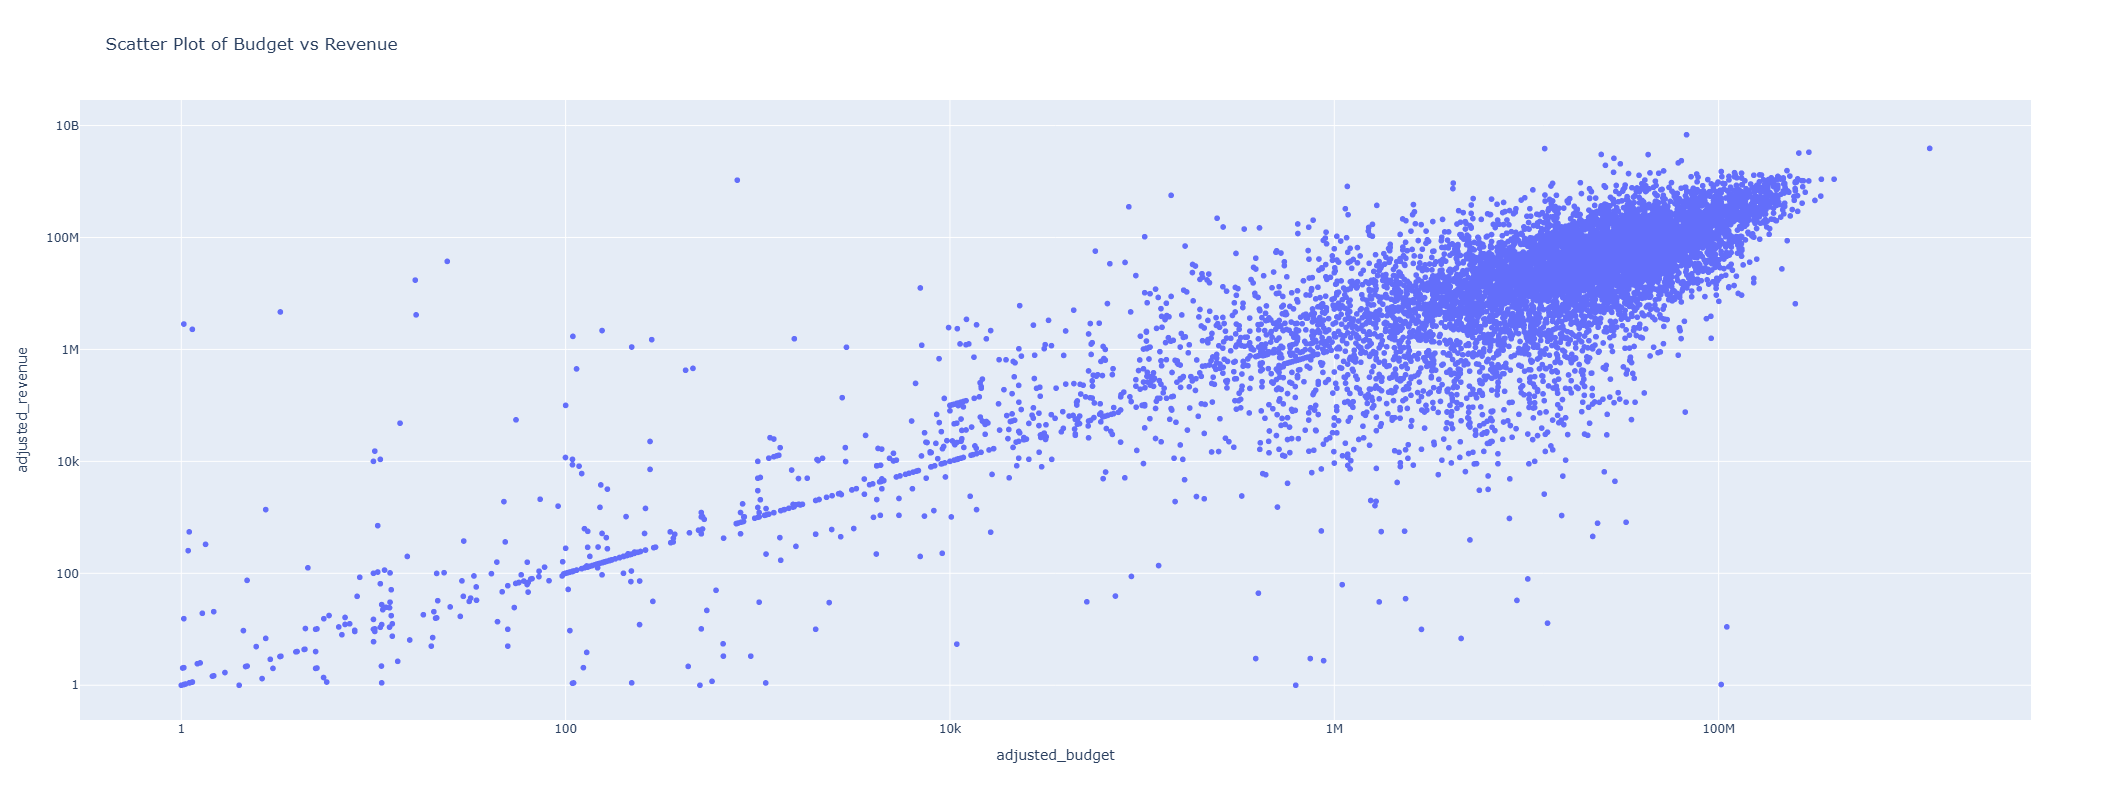

In [16]:
import plotly.express as px

fig = px.scatter(
    regression_dataset_processed_df,
    x='adjusted_budget',
    y='adjusted_revenue',
    title='Scatter Plot of Budget vs Revenue',
    labels={'budget': 'Budget', 'revenue': 'Revenue'}
)

fig.update_layout(
    xaxis=dict(type='log'),
    yaxis=dict(type='log'),
    height=800
)

fig.show()

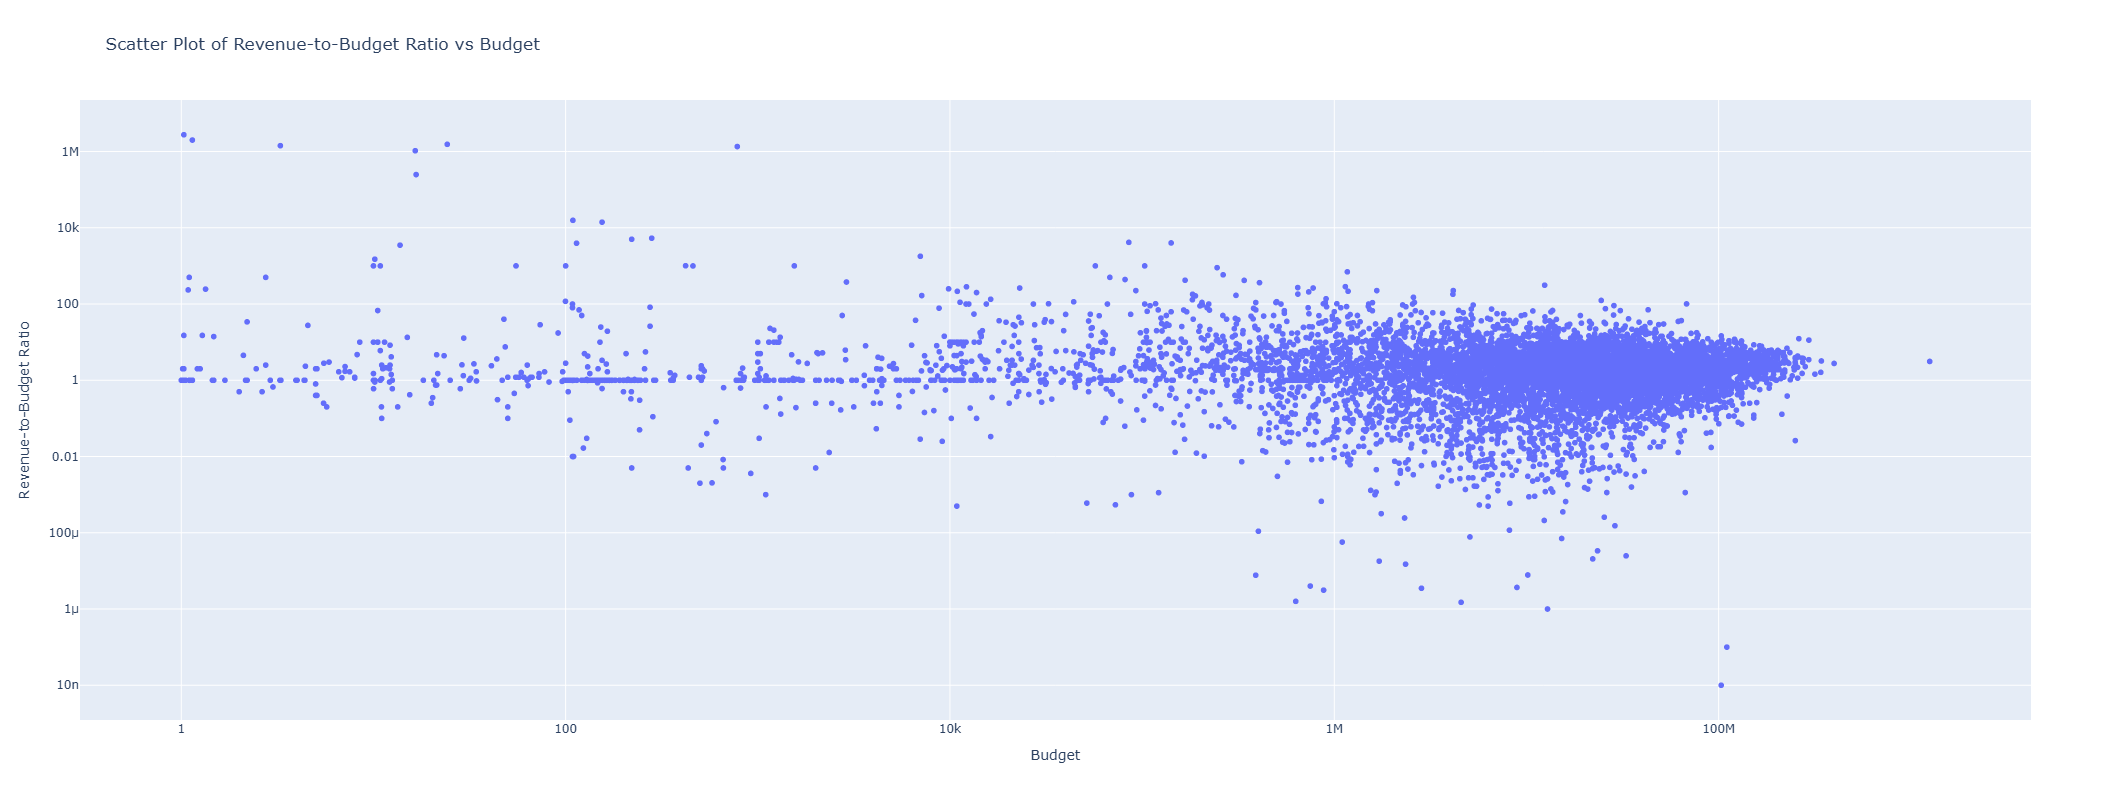

In [19]:
import plotly.express as px

# Create a new column for the revenue/budget ratio
regression_dataset_processed_df['revenue_to_budget_ratio'] = (
    regression_dataset_processed_df['adjusted_revenue'] / regression_dataset_processed_df['adjusted_budget']
)

# Create a scatter plot of revenue/budget ratio vs budget
fig = px.scatter(
    regression_dataset_processed_df,
    x='adjusted_budget',
    y='revenue_to_budget_ratio',
    title='Scatter Plot of Revenue-to-Budget Ratio vs Budget',
    labels={'adjusted_budget': 'Budget', 'revenue_to_budget_ratio': 'Revenue-to-Budget Ratio'}
)

fig.update_layout(
    xaxis=dict(type='log'),
    yaxis=dict(type='log'),
    height=800
)

fig.show()


# Revenue Approach

### Non Separated (based on book or not)

In [78]:
from utils.regression_utils import create_train_test_split

X_train, X_test, y_train, y_test = create_train_test_split(
    regression_dataset_processed_df, 
    target_column='adjusted_revenue', 
    should_split_based_on_book=False, 
    test_size=0.2, 
    seed=42
)['all']


In [79]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     125.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:24:36   Log-Likelihood:            -1.3503e+05
No. Observations:                6675   AIC:                         2.702e+05
Df Residuals:                    6625   BIC:                         2.705e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          8.894e+07   1.85e+06     48.136      0.000    8.53e+07    9.26e+07
vote_average                                  -1.297e+06    2.2e+06     -0.589      0.556   -5.61e+06    3.02e+06
vote_count                                     8.699e+07   2.82e+06     30.887      0.000    8.15e+07    9.25e+07
runtime                                        1.152e+07   2.15e+06      5.364      0.000    7.31e+06    1.57e+07
adult                                          2.285e+06   1.25e+06      1.823      0.068   -1.73e+05    4.74e+06
popularity                                     1.685e+07   2.89e+06      5.829      0.000    1.12e+07    2.25e+07
based_on_book                                  5.442e+06   1.98e+06      2.750      0.006    1.56e+06    9.32e+06
movie_year                                    -2.798e+07   2.03e+06    -13.760      0.000    -3.2e+07    -2.4e+07
adjusted_budget                                7.236e+07   3.24e+06     22.305      0.000     6.6e+07    7.87e+07
genres_count                                  -2.789e+07    1.4e+07     -1.989      0.047   -5.54e+07   -4.01e+05
genres_Action                                  1.227e+07   5.59e+06      2.197      0.028    1.32e+06    2.32e+07
genres_Adventure                               1.452e+07   4.96e+06      2.927      0.003     4.8e+06    2.43e+07
genres_Animation                               1.284e+07   3.75e+06      3.427      0.001    5.49e+06    2.02e+07
genres_Comedy                                   1.21e+07   6.45e+06      1.875      0.061   -5.49e+05    2.47e+07
genres_Crime                                    1.17e+06      5e+06      0.234      0.815   -8.63e+06     1.1e+07
genres_Documentary                             8.646e+06   2.85e+06      3.034      0.002    3.06e+06    1.42e+07
genres_Drama                                   9.702e+06   6.79e+06      1.428      0.153   -3.61e+06     2.3e+07
genres_Family                                  1.322e+07   4.46e+06      2.966      0.003    4.48e+06     2.2e+07
genres_Fantasy                                 2.956e+06   4.05e+06      0.730      0.466   -4.98e+06    1.09e+07
genres_History                                 -4.38e+05   3.33e+06     -0.132      0.895   -6.96e+06    6.09e+06
genres_Horror                                  7.096e+06   4.69e+06      1.514      0.130   -2.09e+06    1.63e+07
genres_Music                                   5.387e+06   3.24e+06      1.661      0.097    -9.7e+05    1.17e+07
genres_Mystery                                  4.19e+06   3.93e+06      1.065      0.287   -3.52e+06    1.19e+07
genres_Romance                                 1.442e+07    5.7e+06      2.530      0.011    3.25e+06    2.56e+07
genre

### Separated (based on book or not)

In [80]:
dict = create_train_test_split(
    regression_dataset_processed_df,
    target_column='adjusted_revenue',
    should_split_based_on_book=True,
    test_size=0.2,
    seed=42
)
X_train_based_on_book, X_test_based_on_book, y_train_based_on_book, y_test_based_on_book = dict['based_on_book']
X_train_not_based_on_book, X_test_not_based_on_book, y_train_not_based_on_book, y_test_not_based_on_book = dict['not_based_on_book']

In [81]:
model = sm.OLS(y_train_based_on_book, X_train_based_on_book)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     17.55
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.61e-76
Time:                        15:24:36   Log-Likelihood:                -10655.
No. Observations:                 526   AIC:                         2.140e+04
Df Residuals:                     479   BIC:                         2.160e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1.881e+08   7.75e+06     24.254      0.000    1.73e+08    2.03e+08
vote_average                                  -8.982e+05   1.04e+07     -0.086      0.931   -2.13e+07    1.95e+07
vote_count                                     9.413e+07   1.37e+07      6.886      0.000    6.73e+07    1.21e+08
runtime                                        3.466e+07   1.21e+07      2.862      0.004    1.09e+07    5.85e+07
adult                                         -1.033e-07   2.71e-07     -0.382      0.703   -6.35e-07    4.29e-07
popularity                                     7.519e+07   1.51e+07      4.994      0.000    4.56e+07    1.05e+08
movie_year                                    -6.126e+07   9.52e+06     -6.436      0.000      -8e+07   -4.26e+07
adjusted_budget                                5.198e+07    8.6e+06      6.047      0.000    3.51e+07    6.89e+07
genres_count                                  -5.987e+07   4.08e+07     -1.469      0.142    -1.4e+08    2.02e+07
genres_Action                                  3.848e+07   2.03e+07      1.899      0.058   -1.33e+06    7.83e+07
genres_Adventure                                5.18e+07   2.27e+07      2.277      0.023     7.1e+06    9.65e+07
genres_Animation                               2.254e+07   1.24e+07      1.822      0.069   -1.77e+06    4.69e+07
genres_Comedy                                  3.491e+07   1.88e+07      1.859      0.064   -1.99e+06    7.18e+07
genres_Crime                                   9.486e+06   1.64e+07      0.579      0.563   -2.27e+07    4.17e+07
genres_Documentary                              1.42e-07   2.64e-07      0.537      0.592   -3.78e-07    6.62e-07
genres_Drama                                   1.127e+07   2.42e+07      0.466      0.641   -3.62e+07    5.88e+07
genres_Family                                  1.564e+07   1.96e+07      0.797      0.426   -2.29e+07    5.42e+07
genres_Fantasy                                 1.043e+07   1.71e+07      0.611      0.542   -2.31e+07     4.4e+07
genres_History                                 9.373e+05   1.36e+07      0.069      0.945   -2.59e+07    2.77e+07
genres_Horror                                  1.672e+07   1.76e+07      0.951      0.342   -1.78e+07    5.13e+07
genres_Music                                  -4.145e+05   9.35e+06     -0.044      0.965   -1.88e+07     1.8e+07
genres_Mystery                                 8.391e+06   1.65e+07      0.510      0.610    -2.4e+07    4.07e+07
genres_Romance                                 2.651e+07   1.98e+07      1.340      0.181   -1.24e+07    6.54e+07
genres_Science Fiction                        -7.666e+06   1.56e+07     -0.491      0.624   -3.84e+07     2.3e+07
genre

In [82]:
model = sm.OLS(y_train_not_based_on_book, X_train_not_based_on_book)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:24:36   Log-Likelihood:            -1.2317e+05
No. Observations:                6148   AIC:                         2.464e+05
Df Residuals:                    6099   BIC:                         2.468e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          8.487e+07    1.6e+06     53.106      0.000    8.17e+07     8.8e+07
vote_average                                   4.089e+05   1.83e+06      0.223      0.823   -3.18e+06       4e+06
vote_count                                      8.33e+07   2.52e+06     33.038      0.000    7.84e+07    8.82e+07
runtime                                        3.521e+06   2.64e+06      1.336      0.182   -1.65e+06    8.69e+06
adult                                          5.895e+06   2.66e+06      2.215      0.027    6.77e+05    1.11e+07
popularity                                     1.007e+07   2.43e+06      4.139      0.000     5.3e+06    1.48e+07
movie_year                                    -2.402e+07   1.69e+06    -14.253      0.000   -2.73e+07   -2.07e+07
adjusted_budget                                8.034e+07   2.11e+06     38.146      0.000    7.62e+07    8.45e+07
genres_count                                  -2.505e+07   1.23e+07     -2.044      0.041   -4.91e+07   -1.03e+06
genres_Action                                  7.791e+06   4.91e+06      1.588      0.112   -1.83e+06    1.74e+07
genres_Adventure                               8.888e+06    4.4e+06      2.022      0.043     2.7e+05    1.75e+07
genres_Animation                               1.307e+07   3.09e+06      4.231      0.000    7.02e+06    1.91e+07
genres_Comedy                                  1.071e+07   5.53e+06      1.937      0.053   -1.29e+05    2.15e+07
genres_Crime                                   2.805e+06   4.06e+06      0.691      0.490   -5.15e+06    1.08e+07
genres_Documentary                              7.21e+06   2.22e+06      3.245      0.001    2.85e+06    1.16e+07
genres_Drama                                   8.932e+06   5.69e+06      1.570      0.117   -2.22e+06    2.01e+07
genres_Family                                  9.779e+06   3.76e+06      2.603      0.009    2.41e+06    1.71e+07
genres_Fantasy                                 1.697e+06   3.61e+06      0.470      0.638   -5.38e+06    8.77e+06
genres_History                                  8.64e+05   2.44e+06      0.354      0.723   -3.92e+06    5.65e+06
genres_Horror                                  7.046e+06   3.52e+06      2.003      0.045    1.51e+05    1.39e+07
genres_Music                                   2.387e+06   2.71e+06      0.879      0.379   -2.93e+06    7.71e+06
genres_Mystery                                 3.002e+06   3.47e+06      0.864      0.388   -3.81e+06    9.81e+06
genres_Romance                                 1.254e+07   4.78e+06      2.623      0.009    3.17e+06    2.19e+07
genres_Science Fiction                         1.717e+06   3.65e+06      0.470      0.638   -5.44e+06    8.88e+06
genre

# Revenue-Budget Fraction Approach

### Non Separated (based on book or not)


In [83]:
regression_dataset_processed_rb_ration_df = regression_dataset_processed_df.copy()
regression_dataset_processed_rb_ration_df['rb_ratio'] = regression_dataset_processed_rb_ration_df['adjusted_revenue'] / regression_dataset_processed_rb_ration_df['adjusted_budget']
regression_dataset_processed_rb_ration_df.drop(columns=['adjusted_revenue', 'adjusted_budget'], inplace=True)

display(regression_dataset_processed_rb_ration_df['rb_ratio'].value_counts())
X_train, X_test, y_train, y_test = create_train_test_split(
    regression_dataset_processed_rb_ration_df,
    target_column='rb_ratio',
    should_split_based_on_book=False,
    test_size=0.2,
    seed=42
)['all']

rb_ratio
1.000000     330
2.000000      61
10.000000     48
4.000000      19
2.500000      16
            ... 
2.045145       1
3.344828       1
1.099973       1
2.380000       1
25.164706      1
Name: count, Length: 7386, dtype: int64

In [84]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.614
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           9.52e-09
Time:                        15:24:37   Log-Likelihood:                -82062.
No. Observations:                6675   AIC:                         1.642e+05
Df Residuals:                    6626   BIC:                         1.646e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1386.7616    660.610      2.099      0.036      91.754    2681.770
vote_average                                    505.6890    784.123      0.645      0.519   -1031.445    2042.823
vote_count                                      122.3267    971.175      0.126      0.900   -1781.489    2026.143
runtime                                        -712.3899    759.141     -0.938      0.348   -2200.550     775.770
adult                                          3991.0204    448.763      8.893      0.000    3111.301    4870.740
popularity                                    -1225.0150   1028.481     -1.191      0.234   -3241.169     791.139
based_on_book                                   984.7434    706.817      1.393      0.164    -400.845    2370.331
movie_year                                     1104.5685    725.577      1.522      0.128    -317.795    2526.932
genres_count                                  -2021.2605   5019.721     -0.403      0.687   -1.19e+04    7819.010
genres_Action                                   974.2465   1997.755      0.488      0.626   -2941.996    4890.489
genres_Adventure                                215.2360   1772.152      0.121      0.903   -3258.753    3689.225
genres_Animation                                144.2731   1340.550      0.108      0.914   -2483.636    2772.182
genres_Comedy                                  1286.7878   2308.625      0.557      0.577   -3238.862    5812.437
genres_Crime                                     28.6613   1790.071      0.016      0.987   -3480.455    3537.778
genres_Documentary                             -388.4564   1019.416     -0.381      0.703   -2386.840    1609.927
genres_Drama                                    952.8497   2430.808      0.392      0.695   -3812.317    5718.017
genres_Family                                   117.5982   1594.862      0.074      0.941   -3008.844    3244.041
genres_Fantasy                                  355.5770   1448.515      0.245      0.806   -2483.979    3195.133
genres_History                                  187.1950   1190.759      0.157      0.875   -2147.076    2521.466
genres_Horror                                  1232.8074   1675.280      0.736      0.462   -2051.282    4516.897
genres_Music                                    220.1182   1160.781      0.190      0.850   -2055.386    2495.623
genres_Mystery                                  262.1733   1408.207      0.186      0.852   -2498.366    3022.713
genres_Romance                                  281.3119   2040.014      0.138      0.890   -3717.772    4280.396
genres_Science Fiction                          403.9539   1464.866      0.276      0.783   -2467.655    3275.562
genre

### Separated (based on book or not)


In [85]:
dict = create_train_test_split(
    regression_dataset_processed_rb_ration_df,
    target_column='rb_ratio',
    should_split_based_on_book=True,
    test_size=0.2,
    seed=42
)
X_train_based_on_book, X_test_based_on_book, y_train_based_on_book, y_test_based_on_book = dict['based_on_book']
X_train_not_based_on_book, X_test_not_based_on_book, y_train_not_based_on_book, y_test_not_based_on_book = dict[
    'not_based_on_book']

In [86]:
model = sm.OLS(y_train_based_on_book, X_train_based_on_book)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.196
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.186
Time:                        15:24:39   Log-Likelihood:                -6566.2
No. Observations:                 526   AIC:                         1.322e+04
Df Residuals:                     480   BIC:                         1.342e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          4459.5117   3259.392      1.368      0.172   -1944.928    1.09e+04
vote_average                                    508.7229   4238.700      0.120      0.905   -7819.978    8837.423
vote_count                                    -2349.2038   5711.454     -0.411      0.681   -1.36e+04    8873.338
runtime                                       -5496.1863   4933.807     -1.114      0.266   -1.52e+04    4198.342
adult                                         -1.044e-10   8.45e-11     -1.235      0.217   -2.71e-10    6.17e-11
popularity                                    -2180.0608   6215.434     -0.351      0.726   -1.44e+04       1e+04
movie_year                                     1697.4191   3927.873      0.432      0.666   -6020.532    9415.370
genres_count                                  -3479.7691   1.71e+04     -0.203      0.839   -3.71e+04    3.02e+04
genres_Action                                 -3621.1681   8514.061     -0.425      0.671   -2.04e+04    1.31e+04
genres_Adventure                               2196.2267   9546.638      0.230      0.818   -1.66e+04     2.1e+04
genres_Animation                                401.7634   5189.040      0.077      0.938   -9794.277    1.06e+04
genres_Comedy                                 -1885.3218   7894.952     -0.239      0.811   -1.74e+04    1.36e+04
genres_Crime                                    590.5127   6885.398      0.086      0.932   -1.29e+04    1.41e+04
genres_Documentary                             4.734e-11   6.96e-11      0.680      0.497   -8.95e-11    1.84e-10
genres_Drama                                   3314.4466   1.02e+04      0.326      0.744   -1.67e+04    2.33e+04
genres_Family                                 -3640.1079   8244.793     -0.442      0.659   -1.98e+04    1.26e+04
genres_Fantasy                                  444.9685   7160.394      0.062      0.950   -1.36e+04    1.45e+04
genres_History                                  273.4750   5727.379      0.048      0.962    -1.1e+04    1.15e+04
genres_Horror                                  -939.1165   7391.144     -0.127      0.899   -1.55e+04    1.36e+04
genres_Music                                   1186.9013   3927.006      0.302      0.763   -6529.346    8903.148
genres_Mystery                                -2735.8583   6918.320     -0.395      0.693   -1.63e+04    1.09e+04
genres_Romance                                -2435.1789   8316.797     -0.293      0.770   -1.88e+04    1.39e+04
genres_Science Fiction                          462.5671   6561.589      0.070      0.944   -1.24e+04    1.34e+04
genres_Thriller                               -1943.4675   8978.938     -0.216      0.829   -1.96e+04    1.57e+04
genre

In [87]:
model = sm.OLS(y_train_not_based_on_book, X_train_not_based_on_book)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.643
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           9.61e-16
Time:                        15:24:40   Log-Likelihood:                -75395.
No. Observations:                6148   AIC:                         1.509e+05
Df Residuals:                    6100   BIC:                         1.512e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2054.9841    674.393      3.047      0.002     732.937    3377.031
vote_average                                    462.2594    770.616      0.600      0.549   -1048.420    1972.939
vote_count                                      526.7649   1034.566      0.509      0.611   -1501.349    2554.879
runtime                                        -926.2221   1098.330     -0.843      0.399   -3079.336    1226.892
adult                                          1.288e+04   1123.544     11.465      0.000    1.07e+04    1.51e+04
popularity                                    -1426.3050   1023.562     -1.393      0.164   -3432.847     580.237
movie_year                                     1092.8073    710.912      1.537      0.124    -300.831    2486.446
genres_count                                   -889.4916   5173.386     -0.172      0.863    -1.1e+04    9252.171
genres_Action                                   744.3461   2070.445      0.360      0.719   -3314.457    4803.149
genres_Adventure                                 -4.1729   1851.652     -0.002      0.998   -3634.065    3625.719
genres_Animation                                -59.4626   1304.220     -0.046      0.964   -2616.195    2497.269
genres_Comedy                                  1090.1133   2333.616      0.467      0.640   -3484.598    5664.825
genres_Crime                                   -232.2017   1713.545     -0.136      0.892   -3591.355    3126.952
genres_Documentary                             -349.3073    937.693     -0.373      0.710   -2187.517    1488.903
genres_Drama                                    394.4753   2401.873      0.164      0.870   -4314.044    5102.994
genres_Family                                  -122.7443   1585.740     -0.077      0.938   -3231.355    2985.866
genres_Fantasy                                  116.0584   1522.966      0.076      0.939   -2869.493    3101.610
genres_History                                  114.5803   1029.383      0.111      0.911   -1903.373    2132.534
genres_Horror                                   881.2763   1483.207      0.594      0.552   -2026.333    3788.886
genres_Music                                     41.6313   1145.818      0.036      0.971   -2204.576    2287.839
genres_Mystery                                  141.1766   1466.733      0.096      0.923   -2734.138    3016.491
genres_Romance                                   88.1692   2017.875      0.044      0.965   -3867.578    4043.916
genres_Science Fiction                          133.3972   1540.773      0.087      0.931   -2887.062    3153.856
genres_Thriller                                -172.8788   1998.730     -0.086      0.931   -4091.095    3745.338
genre